# **Part 1 – NumPy, Matplotlib/Seaborn:**

#Q1

In [54]:
# A.Explain Covariance and Correlation


Covariance measures how two variables change together. if one increase than is the other increase as well or there's opposite relationship.

Cov(X,Y)= $\frac{\sum_{\left( X_{i}-X \right)\left( Y_{i}-Y \right)}^{}}{n-1}$

correlation uses covariance formula. it scales it to be in range of -1 to 1 by standalization so you can have interpreation of how strong the link between them is.

Corr(X,Y)=$\frac{Cov(X,Y)}{\sigma X \sigma Y}$


In [59]:
# B. Load Iris Dataset and Visualize Relationships
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris data
iris_data = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the species as a new column
iris_df['species'] = iris_data.target

# Map numeric species to their names
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris_data.target_names)})

# Display first rows
print(iris_df.head())
print(iris_df.info())
print(iris_df.describe())
print(iris_df['species'].unique())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float

<ipython-input-60-f220f540d858>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=iris_df, x='species', palette='pastel')


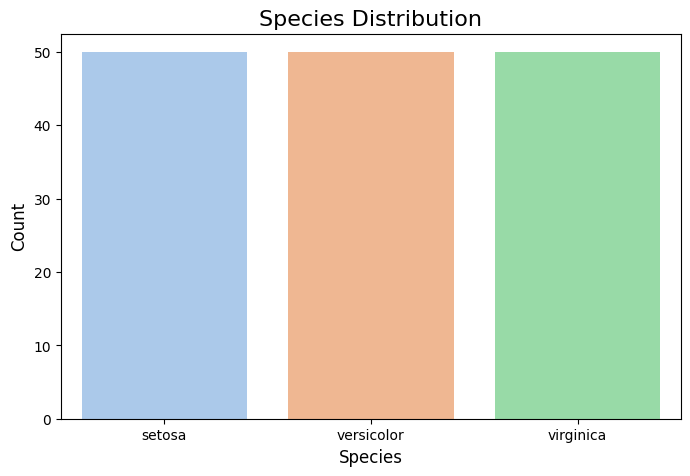

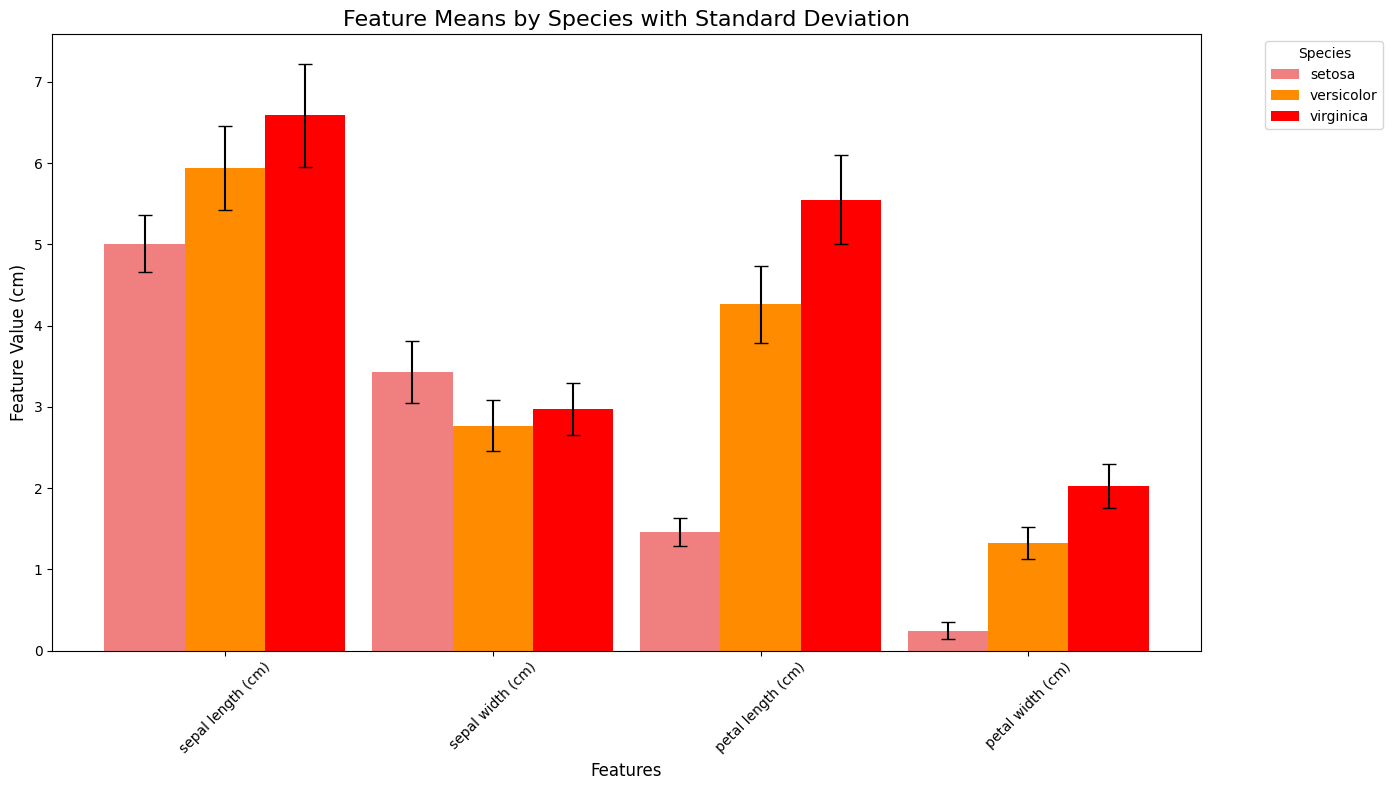

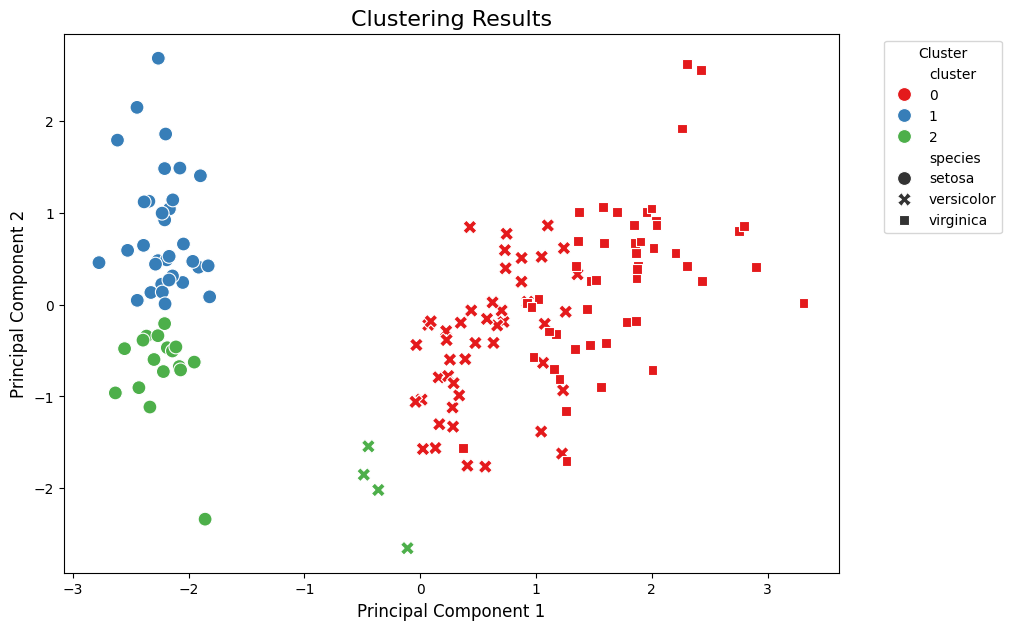

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Species distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=iris_df, x='species', palette='pastel')
plt.title('Species Distribution', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Calculate mean and std by species
feature_mean_by_species = iris_df.groupby('species').mean()
feature_std_by_species = iris_df.groupby('species').std()

# Bar plot of  means with error bar
plt.figure(figsize=(14, 8))
x = np.arange(len(feature_mean_by_species.columns))
width = 0.3

# Plot bars for each species with error bars
for i, (species, color) in enumerate(zip(feature_mean_by_species.index, ['lightcoral', 'darkorange', 'red'])):
    bar = plt.bar(
        x + i * width, feature_mean_by_species.loc[species], width,
        yerr=feature_std_by_species.loc[species], capsize=5, label=species, color=color
    )

# plot
plt.title('Feature Means by Species with Standard Deviation', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Feature Value (cm)', fontsize=12)
plt.xticks(x + width, feature_mean_by_species.columns, rotation=45)
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Clustering
# only numeric features
numeric_features = iris_df.select_dtypes(include=['float64'])

# Standrelize  the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# do KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(scaled_data)

# Reducing dimensions using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
iris_df['pca1'] = pca_data[:, 0]
iris_df['pca2'] = pca_data[:, 1]

# Plot results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=iris_df, x='pca1', y='pca2', hue='cluster', palette='Set1', style='species', s=100)
plt.title('Clustering Results', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


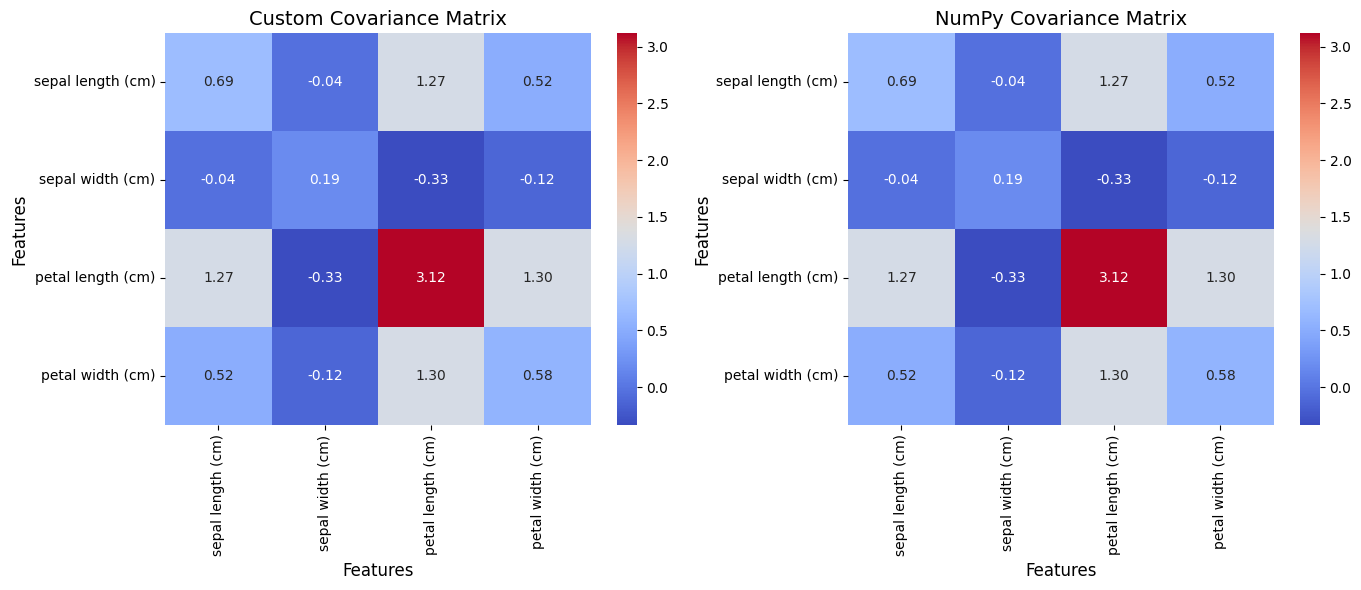

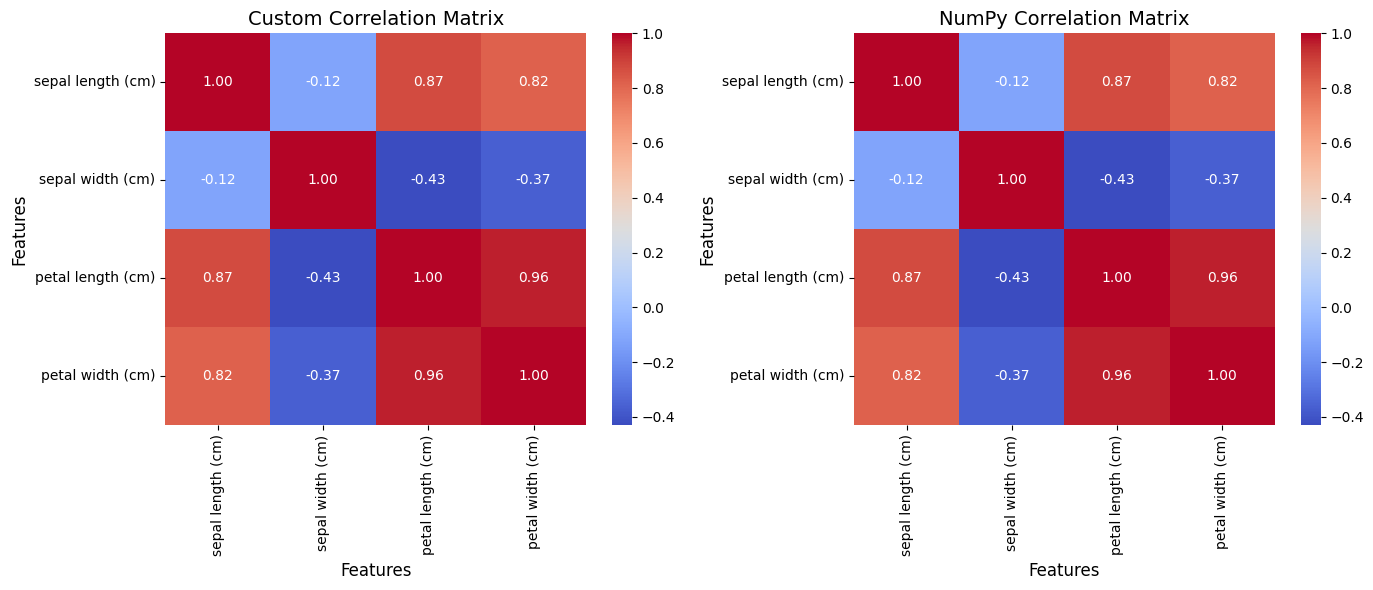

In [47]:
# calculate covariance between two variables
def calcCov(x, y):
    return np.sum((x - np.mean(x)) * (y - np.mean(y))) / (len(x) - 1)

# do covariance matrix
def covMat(data):
    n = data.shape[1]
    cov_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            cov_matrix[i, j] = calcCov(data[:, i], data[:, j])
    return cov_matrix

# correlation matrix using covar matrix
def corrMat(data):
    cov_matrix = covMat(data)
    std_dev = np.sqrt(np.diag(cov_matrix))
    corr_matrix = cov_matrix / np.outer(std_dev, std_dev)
    return corr_matrix

# Use only first 4 columns of the dataset
numeric_data = iris_df.iloc[:, :4].values

# Calculate cov and corr matrixs
custom_cov_matrix = covMat(numeric_data)
custom_corr_matrix = corrMat(numeric_data)

# NumPy's built-in funcs
numpy_cov_matrix = np.cov(numeric_data, rowvar=False)
numpy_corr_matrix = np.corrcoef(numeric_data, rowvar=False)

feature_names = iris_data.feature_names

plt.figure(figsize=(14, 6))

# Custom cov matrix
plt.subplot(1, 2, 1)
sns.heatmap(custom_cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            xticklabels=feature_names, yticklabels=feature_names)
plt.title("Custom Covariance Matrix", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

# NumPy cov matrix
plt.subplot(1, 2, 2)
sns.heatmap(numpy_cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            xticklabels=feature_names, yticklabels=feature_names)
plt.title("NumPy Covariance Matrix", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Custom corr mat
plt.subplot(1, 2, 1)
sns.heatmap(custom_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            xticklabels=feature_names, yticklabels=feature_names)
plt.title("Custom Correlation Matrix", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

# NumPy corr mat
plt.subplot(1, 2, 2)
sns.heatmap(numpy_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            xticklabels=feature_names, yticklabels=feature_names)
plt.title("NumPy Correlation Matrix", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

plt.tight_layout()
plt.show()

# **Part 2 – NumPy, Pandas, MatPlotLib/Seaborn/Plotly:**

# Q2

In [69]:
# Load the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# file path
file_path = '/content/drive/My Drive/Copy of laptop_price - dataset.csv'

# Load the file
df = pd.read_csv(file_path)

# Display  first rows
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

     

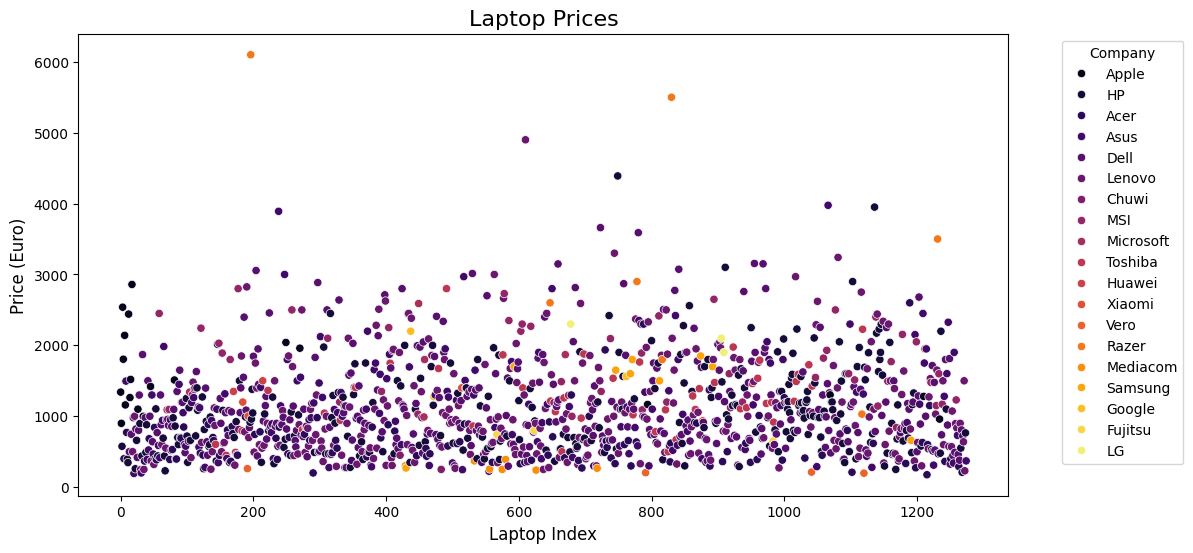

In [63]:
# Plot the price of all the Laptops:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x=df.index, y='Price (Euro)', hue='Company', palette='inferno', legend=True)
plt.title('Laptop Prices', fontsize=16)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Laptop Index', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.show()

Company with the most expensive laptops on average is Razer with an average of 3346.14 Euros.


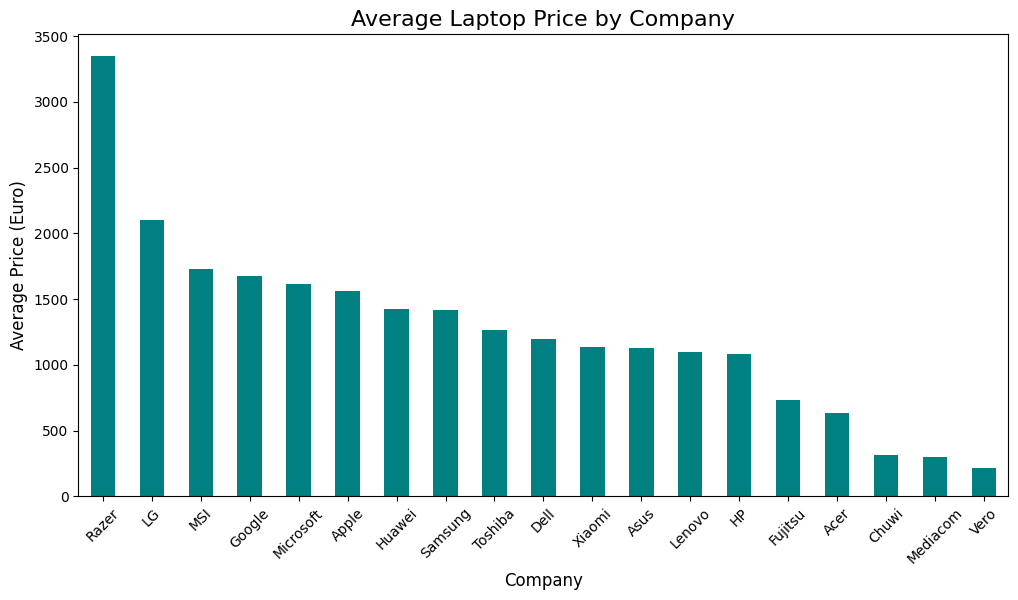

In [68]:
# group by company and calculate avg price
avg_price_per_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
# find the company with the most expensive avg laptop
most_expensive_company = avg_price_per_company.idxmax()
highest_avg_price = avg_price_per_company.max()

print(f"Company with the most expensive laptops on average is {most_expensive_company} with an average of {highest_avg_price:.2f} Euros.")

# Plot for all companies
plt.figure(figsize=(12, 6))
avg_price_per_company.plot(kind='bar', color='teal')
plt.title('Average Laptop Price by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Price (Euro)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [70]:
# Display unique os before cleaning
print("Unique operating systems before cleaning:")
print(df['OpSys'].unique())

# Clean and standardlize the ops column
df['OpSys'] = df['OpSys'].replace({
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'Windows 8': 'Windows',
    'Windows 10 S': 'Windows',
    'macOS': 'MacOS',
    'Mac OS X': 'MacOS',
    'No OS': 'None',
    'Linux': 'Linux'
})

# after cleaning
print("\nUnique operating systems after cleaning:")
print(df['OpSys'].unique())


Unique operating systems before cleaning:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

Unique operating systems after cleaning:
['MacOS' 'None' 'Windows' 'Linux' 'Android' 'Chrome OS']


<ipython-input-71-eb7f0022a9bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='OpSys', y='Price (Euro)', palette='inferno', linewidth=2, showfliers=True, width=0.6)


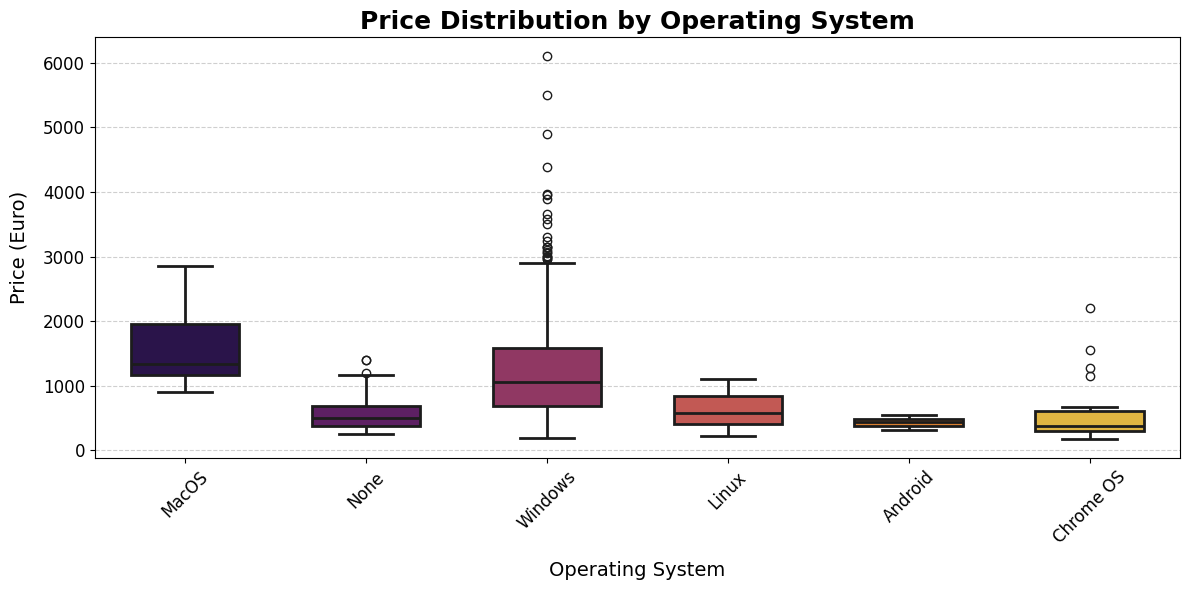

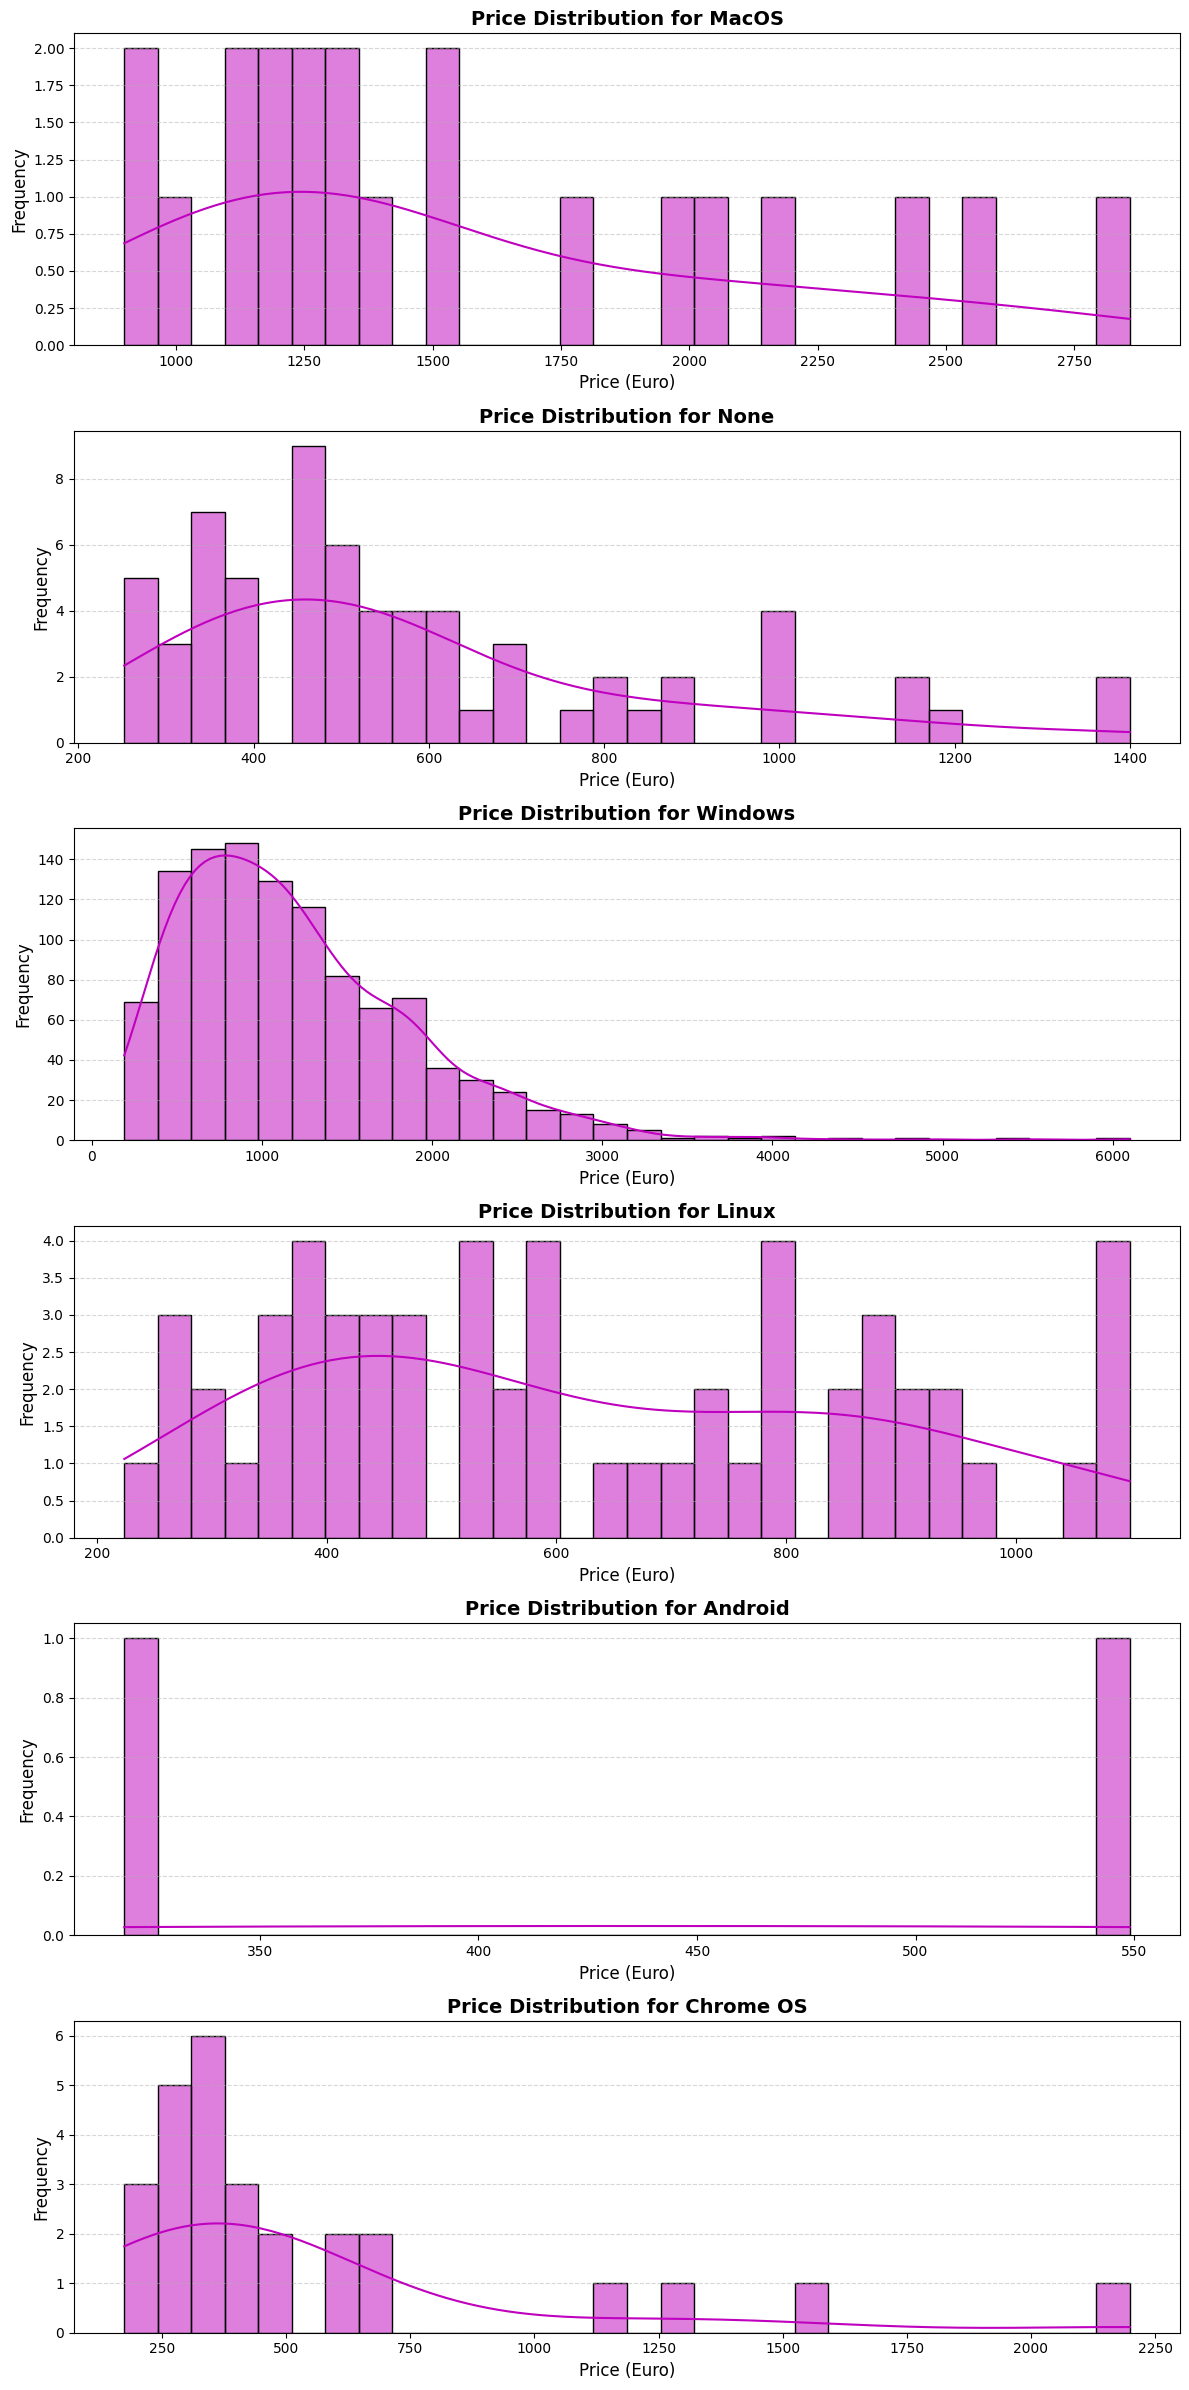

In [71]:
# plot all in one graph then seperatly
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='OpSys', y='Price (Euro)', palette='inferno', linewidth=2, showfliers=True, width=0.6)
plt.title('Price Distribution by Operating System', fontsize=18, fontweight='bold')
plt.xlabel('Operating System', fontsize=14, labelpad=10)
plt.ylabel('Price (Euro)', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot dist of prices for each os type
unique_op_sys = df['OpSys'].unique()
num_op_sys = len(unique_op_sys)

# Creating subplots
fig, axes = plt.subplots(nrows=num_op_sys, ncols=1, figsize=(12, 4 * num_op_sys), sharex=False)

# Plotting dist for each os
for i, op_sys in enumerate(unique_op_sys):
    ax = axes[i] if num_op_sys > 1 else axes
    sns.histplot(df[df['OpSys'] == op_sys]['Price (Euro)'], kde=True, ax=ax, color='m', bins=30)
    ax.set_title(f'Price Distribution for {op_sys}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Price (Euro)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

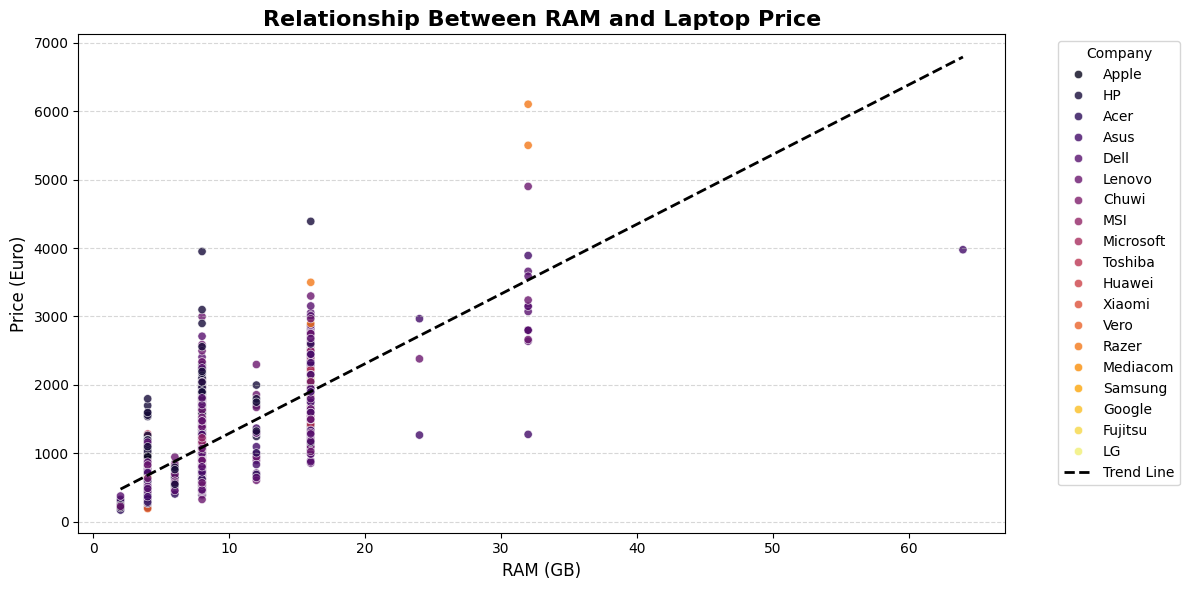

The relationship between RAM and computer price seems to exhibit a positive trend
As RAM (GB) increases, the price generally increases as well, indicating a positive correlation. (don't know if significant yet)


In [72]:
# Relationship Between RAM and Price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='RAM (GB)', y='Price (Euro)', hue='Company', palette='inferno', alpha=0.8)
sns.regplot(data=df, x='RAM (GB)', y='Price (Euro)', scatter=False, color='black', ci=None, line_kws={"linestyle": "--", "linewidth": 2}, label="Trend Line")
plt.title('Relationship Between RAM and Laptop Price', fontsize=16, fontweight='bold')
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("The relationship between RAM and computer price seems to show a positive trend"
"\nAs RAM (GB) increases, the price generally increases as well, indicating a positive correlation. (don't know if significant yet)")


In [73]:
# Create new coulmn for Storage Type:
unique_memory_values = df['Memory'].unique()
print(unique_memory_values)

df['Storage Type'] = df['Memory'].str.extract(r'(SSD|HDD|Flash Storage|Hybrid)')

# Display the first few rows to verify
print(df[['Memory', 'Storage Type']].head())



['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']
                Memory   Storage Type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD


# Q3

additional questions related to this data:
1. I found positive linear trend between RAM and computer price
I can do linear regression and check the rate in which it increases.
then i can visualize it with the trend line.
I can also see if different companies charge with different prices for RAM by calculating the slope for each brand and compare them.

2. I got the storage type, so I can ask: Which combo of RAM and storage type has the best price-to-performance ratio?
I Group laptops by RAM and storage type and calculate the average price for each combination, and set the price-to-performance ratio by dividing the price by the corresponding RAM size. Identify the best combination with the lowest ratio.

i display the price-to-performance ratio for each RAM and storage type combination. Highlight the best combination with a distinct color, using

The price increases by approximately 101.76 Euros for each additional GB of RAM.
The intercept of the trend line is approximately 276.03 Euros.


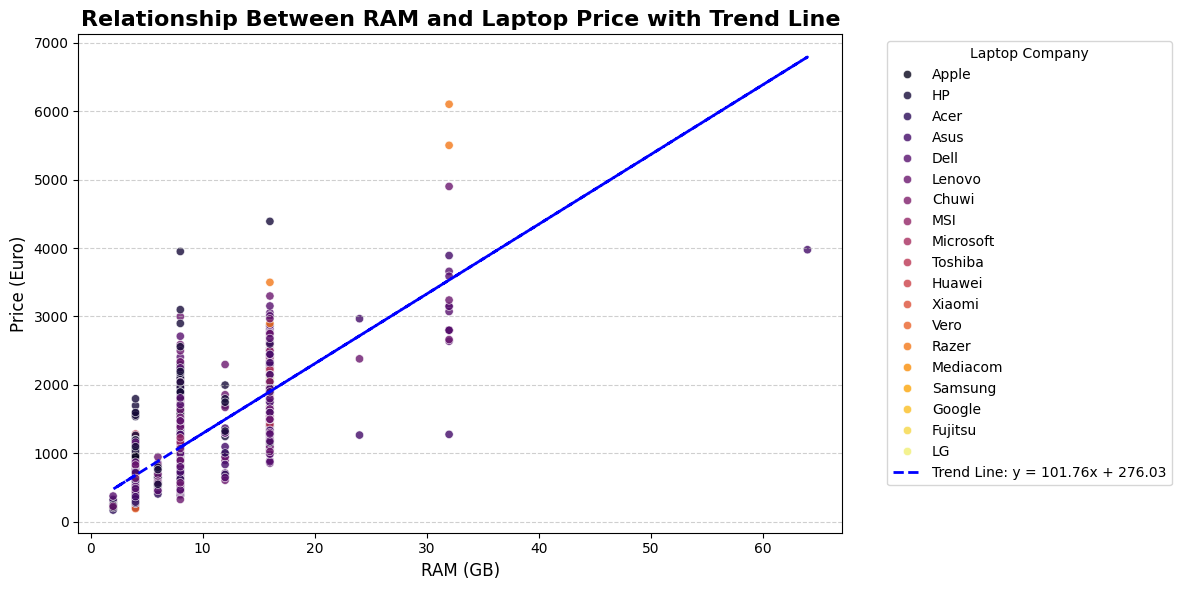

In [80]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X = df[['RAM (GB)']].values
y = df['Price (Euro)'].values

# Fit linear reg model
model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"The price increases by approximately {slope:.2f} Euros for each additional GB of RAM.")
print(f"The intercept of the trend line is approximately {intercept:.2f} Euros.")


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='RAM (GB)', y='Price (Euro)', hue='Company', palette='inferno', alpha=0.8)
plt.plot(X, model.predict(X), color='blue', linestyle='--', linewidth=2, label=f'Trend Line: y = {slope:.2f}x + {intercept:.2f}')
plt.title('Relationship Between RAM and Laptop Price with Trend Line', fontsize=16, fontweight='bold')
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.legend(title='Laptop Company',bbox_to_anchor=(1.05, 1) , loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


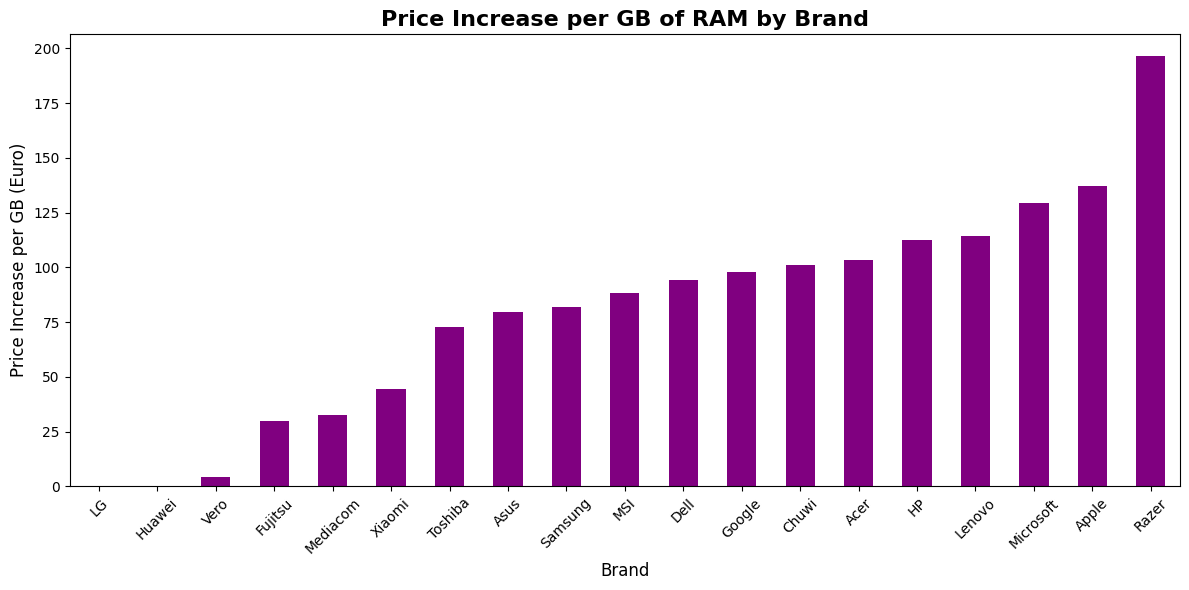

In [81]:
# Calculate slope for each brand
brand_slopes = {}
for brand in df['Company'].unique():
    brand_data = df[df['Company'] == brand]
    if len(brand_data) > 1:
        model = LinearRegression()
        X_brand = brand_data[['RAM (GB)']].values
        y_brand = brand_data['Price (Euro)'].values
        model.fit(X_brand, y_brand)
        brand_slopes[brand] = model.coef_[0]

# Bar plot by brand
plt.figure(figsize=(12, 6))
pd.Series(brand_slopes).sort_values().plot(kind='bar', color='purple')
plt.title('Price Increase per GB of RAM by Brand', fontsize=16, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price Increase per GB (Euro)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The best price-to-performance combination is RAM: 16GB with Storage Type: HDD.
The average price for this combination is 957.00 Euros.
The price-to-performance ratio for this combination is 59.81 Euros per GB.


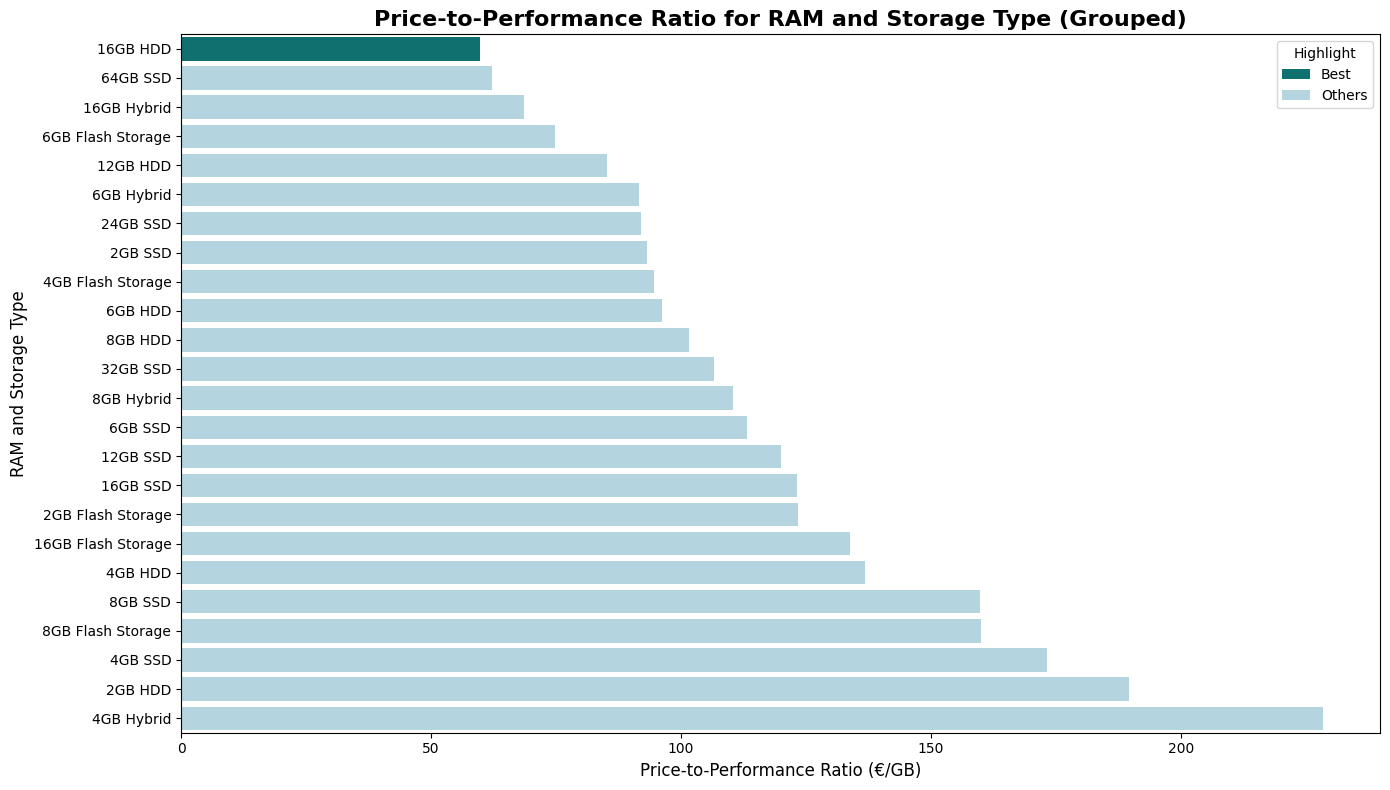

In [82]:
# Group laptops by RAM and Storage Type and calculate the avg price for each combo
price_performance = df.groupby(['RAM (GB)', 'Storage Type'])['Price (Euro)'].mean().unstack()

# Fill empty cells with 0
price_performance_filled = price_performance.fillna(0)

# Calculate the price-per-GB ratio for each RAM and Storage Type combination
price_performance_ratio = price_performance / price_performance.index.values[:, None]


best_combo = price_performance_ratio.stack().idxmin()
best_ratio = price_performance_ratio.stack().min()
best_price = price_performance.loc[best_combo]
best_ram = best_combo[0]
best_storage = best_combo[1]

# Print results
print(f"The best price-to-performance combination is RAM: {best_ram}GB with Storage Type: {best_storage}.")
print(f"The average price for this combination is {best_price:.2f} Euros.")
print(f"The price-to-performance ratio for this combination is {best_ratio:.2f} Euros per GB.")

# Flatten the ratio
price_performance_ratio_flat = price_performance_ratio.stack().reset_index()
price_performance_ratio_flat.columns = ['RAM (GB)', 'Storage Type', 'Price-to-Performance Ratio']

# Sort
price_performance_ratio_flat = price_performance_ratio_flat.sort_values(by='Price-to-Performance Ratio')

# Highlight the best combo
price_performance_ratio_flat['Highlight'] = [
    'Best' if (row['RAM (GB)'], row['Storage Type']) == best_combo else 'Others'
    for _, row in price_performance_ratio_flat.iterrows()
]

# Plot ratio
plt.figure(figsize=(14, 8))

price_performance_ratio_flat['RAM and Storage'] = (
    price_performance_ratio_flat['RAM (GB)'].astype(str) + "GB " + price_performance_ratio_flat['Storage Type']
)

sns.barplot(
    data=price_performance_ratio_flat,
    x='Price-to-Performance Ratio',
    y='RAM and Storage',
    hue='Highlight',
    dodge=False,
    palette={'Best': 'teal', 'Others': 'lightblue'}
)

plt.title("Price-to-Performance Ratio for RAM and Storage Type (Grouped)", fontsize=16, fontweight='bold')
plt.xlabel("Price-to-Performance Ratio (€/GB)", fontsize=12)
plt.ylabel("RAM and Storage Type", fontsize=12)
plt.tight_layout()
plt.show()
